In [3]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from mypackage.elastic import Document
from sentence_transformers import SentenceTransformer
from mypackage.sentence import SentenceChain, doc_to_sentences, iterative_merge
from mypackage.clustering import chain_clustering, visualize_clustering, group_chains_by_label

In [4]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
doc = Document.from_json("../cached_docs/pubmed_0000.json", text_path="article")

In [ ]:
sentences = doc_to_sentences(doc, model)
merged = iterative_merge(sentences, threshold=0.6, round_limit=None, pooling_method="average")

In [12]:
labels, clusters = chain_clustering(merged)
print(len(clusters))

4


/home/zoukos/ceid/final/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


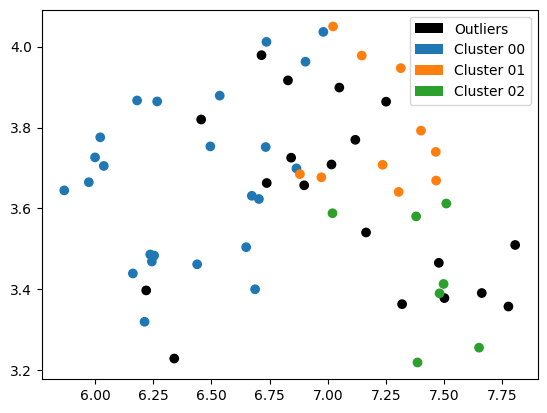

In [13]:
visualize_clustering(merged, labels)

In [14]:
from rich.panel import Panel
from rich.console import Console

console = Console()

for cluster in clusters.items():
    text = "\n\n".join([chain.text for chain in cluster[1]])
    console.print(Panel(text, title = f"Cluster {cluster[0]:02}",border_style="cyan bold"))

╭────────────────────────────────────────────────── Cluster -1 ───────────────────────────────────────────────────╮
│ anxiety affects quality of life in those living with parkinson 's disease ( pd ) more so than overall cognitive │
│ status , motor deficits , apathy , and depression [ 13 ] . although anxiety and depression are often related    │
│ and coexist in pd patients , recent research suggests that anxiety rather than depression is the most prominent │
│ and prevalent mood disorder in pd [ 5 , 6 ] . yet , our current understanding of anxiety and its impact on      │
│ cognition in pd , as well as its neural basis and best treatment practices , remains meager and lags far behind │
│ that of depression . overall , neuropsychiatric symptoms in pd have been shown to be negatively associated with │
│ cognitive performance . for example , higher depression scores have been correlated with lower scores on the    │
│ mini - mental state exam ( mmse ) [ 8 , 9 ] as well as tests of memory and executive functions ( e.g. ,         │
│ attention ) [ 1014 ] .                                                                                          │
│                                                                                                                 │
│ inclusion criteria involved a diagnosis of idiopathic pd according to the united kingdom parkinson 's disease   │
│ society brain bank criteria   and were confirmed by a neurologist ( sjgl ) .                                    │
│                                                                                                                 │
│ patients also had to have an adequate proficiency in english and have completed a full neuropsychological       │
│ assessment .                                                                                                    │
│                                                                                                                 │
│ self - reported hads was used to assess anxiety in pd and has been previously shown to be a useful measure of   │
│ clinical anxiety in pd . a cut - off score of > 8 on the anxiety subscale of the hads ( hads - a ) was used to  │
│ identify pd cases with anxiety ( pda+ ) , while a cut - off score of < 6 on the hads - a was used to identify   │
│ pd cases without anxiety ( pda ) .                                                                              │
│                                                                                                                 │
│ the neurological evaluation rated participants according to hoehn and yahr ( h&y ) stages   and assessed their  │
│ motor symptoms using part iii of the revised mds task force unified parkinson 's disease rating scale ( updrs ) │
│ . in a similar way                                                                                              │
│                                                                                                                 │
│ this was determined by calculating a total left and right score from rigidity items 3035 , voluntary movement   │
│ items 3643 , and tremor items 5057 from the mds - updrs part iii ( see table 1 ) .                              │
│                                                                                                                 │
│ working memory was assessed using the digit span forward and backward subtest of the wechsler memory scale -    │
│ iii ( raw scores ) .                                                                                            │
│                                                                                                                 │
│ demographic , clinical , and neuropsychological variables were compared between the two groups with the         │
│ independent t - test or mann  whitney u test , depending on whether the variable met parametric assumptions .   │
│                                                       

╭────────────────────────────────────────────────── Cluster 00 ───────────────────────────────────────────────────╮
│ likewise , apathy and anhedonia in pd patients have been associated with executive dysfunction [ 10 , 1523 ] .  │
│                                                                                                                 │
│ however , few studies have specifically investigated the relationship between anxiety and cognition in pd .     │
│                                                                                                                 │
│ one study showed a strong negative relationship between anxiety ( both state and trait ) and overall cognitive  │
│ performance ( measured by the total of the repeatable battery for the assessment of neuropsychological status   │
│ index ) within a sample of 27 pd patients .                                                                     │
│                                                                                                                 │
│ furthermore , trait anxiety was negatively associated with each of the cognitive domains assessed by the rbans  │
│ ( i.e. , immediate memory , visuospatial construction , language , attention , and delayed memory ) .           │
│                                                                                                                 │
│ two further studies have examined whether anxiety differentially affects cognition in patients with left -      │
│ sided dominant pd ( lpd ) versus right - sided dominant pd ( rpd ) ; however , their findings were inconsistent │
│ . the first study found that working memory performance was worse in lpd patients with anxiety compared to rpd  │
│ patients with anxiety , whereas the second study reported that , in lpd , apathy but not anxiety was associated │
│ with performance on nonverbally mediated executive functions and visuospatial tasks ( e.g. , tmt - b , wms -    │
│ iii spatial span ) , while in rpd , anxiety but not apathy significantly correlated with performance on         │
│ verbally mediated tasks ( e.g. , clock reading test and boston naming test ) . furthermore , anxiety was        │
│ significantly correlated with neuropsychological measures of attention and executive and visuospatial functions │
│ . taken together , it is evident that there are limited and inconsistent findings describing the relationship   │
│ between anxiety and cognition in pd and more specifically how anxiety might influence particular domains of     │
│ cognition such as attention and memory and executive functioning . it is also striking that , to date , no      │
│ study has examined the influence of anxiety on cognition in pd by directly comparing groups of pd patients with │
│ and without anxiety while excluding depression . given that research on healthy young adults suggests that      │
│ anxiety reduces processing capacity and impairs processing efficiency , especially in the central executive and │
│ attentional systems of working memory [ 26 , 27 ] , we hypothesized that pd patients with anxiety would show    │
│ impairments in attentional set - shifting and working memory compared to pd patients without anxiety .          │
│ furthermore , since previous work , albeit limited , has focused on the influence of symptom laterality on      │
│ anxiety and cognition , we also explored this relationship .                                                    │
│                                                                                                                 │
│ seventeen pd patients with anxiety and thirty - three pd patients without anxiety were included in this study ( │
│ see table 1 ) .                                                                                                 │
│                                                                                                                 │
│ ten patients in this study ( 5 pd with anxiety ; 5 pd 

╭────────────────────────────────────────────────── Cluster 01 ───────────────────────────────────────────────────╮
│ the cross - sectional data from these participants was taken from a patient database that has been compiled     │
│ over the past 8 years ( since 2008 ) at the parkinson 's disease research clinic at the brain and mind centre , │
│ university of sydney .                                                                                          │
│                                                                                                                 │
│ patients were also excluded if they had other neurological disorders , psychiatric disorders other than         │
│ affective disorders ( such as anxiety ) , or if they reported a score greater than six on the depression        │
│ subscale of the hospital anxiety and depression scale ( hads ) . thus , all participants who scored within a    │
│ depressed  ( hads - d > 6 ) range were excluded from this study , in attempt to examine a refined sample of pd  │
│ patients with and without anxiety in order to determine the independent effect of anxiety on cognition .        │
│                                                                                                                 │
│ this research was approved by the human research ethics committee of the university of sydney , and written     │
│ informed consent was obtained from all participants .                                                           │
│                                                                                                                 │
│ this criterion was more stringent than usual ( > 7 cut - off score ) , in effort to create distinct patient     │
│ groups .                                                                                                        │
│                                                                                                                 │
│ all analyses employed an alpha level of p < 0.05 and were two - tailed .                                        │
│                                                                                                                 │
│ groups were matched in age ( t(48 ) = 1.31 , p = 0.20 ) , disease duration ( u = 259 , p = 0.66 ) , updrs - iii │
│ score ( u = 250.5 , p = 0.65 ) , h&y ( u = 245 , p = 0.43 ) , ledd ( u = 159.5 , p = 0.80 ) , and depression (  │
│ hads - d ) ( u = 190.5 , p = 0.06 ) .                                                                           │
│                                                                                                                 │
│ additionally , all groups were matched in the distribution of gender (  = 0.098 , p = 0.75 ) and side -         │
│ affected (  = 0.765 , p = 0.38 ) .                                                                              │
│                                                                                                                 │
│ although these results align with previous research , interpretations of these findings should be made with     │
│ caution due to the small sample size in the lpd comparison specifically .                                       │
│                                                                                                                 │
│ one advantage the hads questionnaire provided over other anxiety scales was that it assessed both anxiety and   │
│ depression simultaneously and allowed us to control for coexisting depression .                                 │
│                                                                                                                 │
│ although there was a trend that the pda+ group self - reported higher levels of depression than the pda group , │
│ all participants included in the study scored < 6 on the depression subscale of the hads .                      │
╰───────────────────────────────────────────────────────

╭────────────────────────────────────────────────── Cluster 02 ───────────────────────────────────────────────────╮
│ processing speed was assessed using the trail making test , part a ( tmt - a , z - score ) .                    │
│                                                                                                                 │
│ attentional set - shifting was measured using the trail making test , part b ( tmt - b , z - score ) .          │
│                                                                                                                 │
│ language was assessed with semantic and phonemic verbal fluency via the controlled oral word associated test (  │
│ cowat animals and letters , z - score ) .                                                                       │
│                                                                                                                 │
│ the ability to retain learned verbal memory was assessed using the logical memory subtest from the wechsler     │
│ memory scale - iii ( lm - i z - score , lm - ii z - score , % lm retention z - score ) . the mini - mental      │
│ state examination ( mmse )                                                                                      │
│                                                                                                                 │
│ there were no group differences for tmt - a performance ( u = 256 , p = 0.62 ) ( table 2 ) ; however , the pda+ │
│ group had worse performance on the trail making test part b ( t(46 ) = 2.03 , p = 0.048 ) compared to the pda   │
│ group ( figure 1 ) . the pda+ group also demonstrated significantly worse performance on the digit span forward │
│ subtest ( t(48 ) = 2.22 , p = 0.031 ) and backward subtest ( u = 190.5 , p = 0.016 ) compared to the pda group  │
│ ( figures 2(a ) and 2(b ) ) .                                                                                   │
│                                                                                                                 │
│ logical memory i immediate recall test ( u = 176 , p = 0.059 ) showed a trend that the pda+ group had worse new │
│ verbal learning and immediate recall abilities than the pda group . however , logical memory ii test            │
│ performance ( u = 219 , p = 0.204 ) and logical memory % retention ( u = 242.5 , p = 0.434 ) did not differ     │
│ between groups .                                                                                                │
│                                                                                                                 │
│ lpda+ demonstrated worse performance on the digit span forward test ( t(19 ) = 2.29 , p = 0.033 ) compared to   │
│ lpda , whereas rpda+ demonstrated worse performance on the digit span backward test ( u = 36.5 , p = 0.006 ) ,  │
│ lm - i immediate recall ( u = 37.5 , p = 0.008 ) , and lm - ii ( u = 45.0 , p = 0.021 ) but not lm % retention  │
│ ( u = 75.5 , p = 0.39 ) compared to rpda.                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [ ]:
print(clusters[3].kth_most_similar_chain().text)

In [15]:
from mypackage.clustering import cluster_mask

mask = cluster_mask(clusters)

In [16]:
print(mask)

[-1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, -1, 0, 1, 1, 1, -1, -1, 1, -1, -1, 2, 2, -1, 2, 2, -1, -1, 1, -1, -1, 1, 1, 2, 2, -1, 2, -1, -1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, -1, 0, 1, 1, 0, 0, 0, 0, 0]


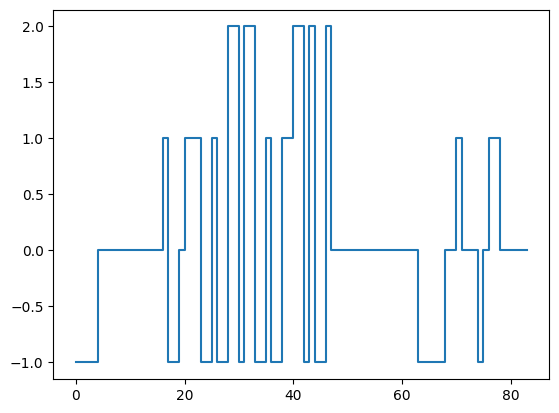

In [17]:
from matplotlib import pyplot as plt

plt.step(list(range(len(mask))), mask)
plt.show()